# **Artist Popularity Analysis on Spotify**

# **Project Background**

The Artist Popularity Analysis on Spotify Datasets is an in-depth exploration into the various factors that influence an artist's popularity on the Spotify platform. With the emerging market of digital music platforms, understanding the dynamics of artist popularity has never been more crucial for both new and established artists. This project will utilize data from Spotify to dive into the features and attributes that make an artist rise above the rest.

# **Potential Challenges**

- Ensuring data is representative of a diverse range of artists from different genres, backgrounds, and regions.
- Handling large datasets and ensuring computational efficiency during data processing and analysis.
- Elaborate the cause-effect relationships from correlations.
- Ensure that the developed models are not overfitting and can be generalize to new, unseen data.

# **Benefits of the Project**

- Artists and record labels can gain insights into what factors that has the most significant influence popularity, allowing them to make informed decisions about song production and release strategies.
- Spotify and other streaming platforms can use the findings to refine their algorithms and improve the user experience.
- Music enthusiasts and researchers can better understand the dynamics of music popularity in the digital age.

# **Project Goals**

**1. Data Preparation:**

  - 1.1. Merge the artist dataset with the tracks dataset on artist IDs to associate tracks with their respective artists.
  - 1.2. Calculate metrics for each artist like the average track popularity, average audio features, number of tracks, etc.

**2. Exploratory Data Analysis (EDA):**

  - 2.1. Visualize the distribution of artist popularity.
  - 2.2. Examine the relationship between artist popularity and various factors (e.g., average track popularity, number of tracks, average audio features).
  - 2.3. Identify potential outliers.

**3. Feature Engineering:**

  - 3.1. Create new features if necessary (e.g., a feature representing the variability in track popularity for an artist).
  - 3.2. Normalize or scale features if they have different units or scales.

**4. Model Building:**

  - 4.1. Split the data into training and testing sets.
  - 4.2. Evaluate model performance using metrics such as RMSE (Root Mean Square Error) or MAE (Mean Absolute Error).
  - 4.3. Use regression models to predict artist popularity based on the derived features.

**5. Model Interpretation:**

  - 5.1. Analyze the feature importance from the regression model to understand which features most influence artist popularity.
  - 5.2. Visualize the relationship between important features and artist popularity.

**6. Conclusions:**

  - 6.1. Summarize the main findings from the overall analysis.
  - 6.2. Provide recommendations or insights for artists, record labels, or music platforms based on the findings.

# **Initializaiton**

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#for importing files to google collab
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#upload datasets
#uploaded = files.upload()

In [35]:
# Load the datasets
artists_df = pd.read_csv('/content/artists.csv')
tracks_df = pd.read_csv('/content/tracks.csv')

# Display the first few rows of each dataset
artists_head = artists_df.head()
tracks_head = tracks_df.head()

In [36]:
artists_head

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [37]:
tracks_head

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [45]:
artists_df.info(), tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672

(None, None)

First, let's examine the contents of the datasets to understand their structure and the type of information they contain.

I'll start by loading and inspecting the first few rows of each dataset.

Based on the data:

**Artists Dataset** contains:
1. `id`: Artist ID
2. `followers`: Number of followers
3. `genres`: Genres associated with the artist
4. `name`: Artist's name
5. `popularity`: Popularity score

**Tracks Dataset** contains:
1. `id`: Track ID
2. `name`: Track's name
3. `popularity`: Popularity score
4. `duration_ms`: Duration of the track in milliseconds
5. `explicit`: Whether the track has explicit content (1 if yes, 0 otherwise)
6. `artists`: Name of the artists
7. `id_artists`: ID of the artists
8. `release_date`: Release date of the track
9. Audio features such as `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `time_signature`.



# **1. Data Preparation:**

**1.1. Merge the artist dataset with the tracks dataset on artist IDs to associate tracks with their respective artists.**

Let's begin with the first step: Data Preparation. I'll merge the datasets and calculate metrics for each artist.

In [ ]:
# Merge the artists and tracks datasets on artist IDs
merged_df = tracks_df.merge(artists_df, left_on="id_artists", right_on="id", suffixes=("_track", "_artist"))

# Calculate metrics for each artist
artist_metrics = merged_df.groupby("id_artist").agg(
    avg_track_popularity=("popularity_track", "mean"),
    total_tracks=("id_track", "count"),
    avg_danceability=("danceability", "mean"),
    avg_energy=("energy", "mean"),
    avg_loudness=("loudness", "mean"),
    avg_speechiness=("speechiness", "mean"),
    avg_acousticness=("acousticness", "mean"),
    avg_instrumentalness=("instrumentalness", "mean"),
    avg_liveness=("liveness", "mean"),
    avg_valence=("valence", "mean"),
    avg_tempo=("tempo", "mean"),
).reset_index()

# Merge the metrics with the artist dataset to include artist names, followers, genres, etc.
artist_data = artist_metrics.merge(artists_df, left_on="id_artist", right_on="id")


In [47]:
# Display the first few rows of the processed dataset
artist_data.head()

,id_artist,avg_track_popularity,total_tracks,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,id,followers,genres,name,popularity


It appears there's an issue with merging the datasets. The resulting DataFrame is empty, which suggests that there might not be a direct match between the `id_artists` column in the tracks dataset and the `id` column in the artists dataset.

One possible reason could be that the `id_artists` column in the tracks dataset might contain lists of artist IDs (since a track can have multiple artists).

Let's inspect the unique values in the `id_artists` column to understand its structure better.

**1.2. Calculate metrics for each artist like the average track popularity, average audio features, number of tracks, etc.**

In [48]:
# Inspecting the unique values in the id_artists column
unique_id_artists = tracks_df['id_artists'].unique()

In [49]:
# Displaying the first few unique values to understand the structure
unique_id_artists[:10]

array(["['45tIt06XoI0Iio4LBEVpls']", "['14jtPCOoNZwquk5wd9DxrY']",
       "['5LiOoJbxVSAMkBS2fUm3X2']", "['3BiJGZsyX9sJchTqcSA7Su']",
       "['2nuMRGzeJ5jJEKlfS7rZ0W']", "['4AxgXfD7ISvJSTObqm4aIE']",
       "['5nWlsH5RDgFuRAiDeOFVmf']", "['4mSouLpNSEY1d7OdIjlFiP']",
       "['7DIlOK9L8d0IQ7Xk8aJxDW']", "['7vVR02JJYvsEAEPNHQMx0Q']"],
      dtype=object)

As suspected, the `id_artists` column contains lists (even represented as strings) of artist IDs. Given this structure, a direct merge using this column will not work.

To address this, I'll:

1. Convert the string representation of the list in `id_artists` to an actual Python list.
2. "**Explode**" the `id_artists` column, which will create multiple rows for tracks with multiple artists, each row having one of the artist IDs.
3. Merge this transformed dataset with the artists dataset.

Let's proceed with these steps.

In [50]:
# Convert string representation of list to actual list
tracks_df['id_artists'] = tracks_df['id_artists'].str.strip("[]").str.replace("'", "").str.split(", ")

# Explode the id_artists column
exploded_tracks_df = tracks_df.explode('id_artists')

# Merge the exploded dataset with the artists dataset
merged_df = exploded_tracks_df.merge(artists_df, left_on="id_artists", right_on="id", suffixes=("_track", "_artist"))

# Calculate metrics for each artist
artist_metrics = merged_df.groupby("id_artist").agg(
    avg_track_popularity=("popularity_track", "mean"),
    total_tracks=("id_track", "count"),
    avg_danceability=("danceability", "mean"),
    avg_energy=("energy", "mean"),
    avg_loudness=("loudness", "mean"),
    avg_speechiness=("speechiness", "mean"),
    avg_acousticness=("acousticness", "mean"),
    avg_instrumentalness=("instrumentalness", "mean"),
    avg_liveness=("liveness", "mean"),
    avg_valence=("valence", "mean"),
    avg_tempo=("tempo", "mean"),
).reset_index()

# Merge the metrics with the artist dataset to include artist names, followers, genres, etc.
artist_data = artist_metrics.merge(artists_df, left_on="id_artist", right_on="id")


In [51]:
# Display the first few rows of the processed dataset
artist_data.head()

,id_artist,avg_track_popularity,total_tracks,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,id,followers,genres,name,popularity
0,0001ZVMPt41Vwzt1zsmuzp,52.000000,1,0.57100,0.534000,-7.451000,0.033600,0.060100,0.000000,0.300000,0.54400,139.97200,0001ZVMPt41Vwzt1zsmuzp,13667.0,['opm'],Thyro & Yumi,39
1,0001wHqxbF2YYRQxGdbyER,0.000000,1,0.52200,0.887000,-6.601000,0.039300,0.000569,0.816000,0.557000,0.15000,133.98800,0001wHqxbF2YYRQxGdbyER,6329.0,['progressive psytrance'],Motion Drive,19
2,0006sHOabJ20USMjG8cWtD,46.000000,1,0.60700,0.540000,-12.037000,0.039300,0.431000,0.000000,0.707000,0.47300,92.05200,0006sHOabJ20USMjG8cWtD,705.0,[],The Art Company,32
3,000BblCiHJeKvtiq5aiHOs,35.000000,2,0.52100,0.819500,-5.086500,0.054850,0.005685,0.000090,0.175500,0.58650,123.54500,000BblCiHJeKvtiq5aiHOs,1994.0,[],51 Koodia,34
4,000p4jMMhpEHq1h6PFCyO1,11.583333,12,0.64325,0.766833,-7.712833,0.040742,0.174719,0.000194,0.146675,0.80275,123.52225,000p4jMMhpEHq1h6PFCyO1,335.0,['estonian pop'],Anne Veski,24


**Conclusion**

The data preparation phase is now complete. Now, I have successfully merged the tracks and artists datasets, and computed various metrics for each artist, such as average track popularity, average danceability, and the total number of tracks.

# **2. Exploratory Data Analysis (EDA):**

With this artist-centric dataset in place, we can proceed with the Exploratory Data Analysis (EDA) phase. In this phase, we'll visually explore the relationships between artist popularity and various computed metrics to gain insights into potential influencing factors.

**2.1. Visualize the distribution of artist popularity.**

Let's start by visualizing the distribution of artist popularity.

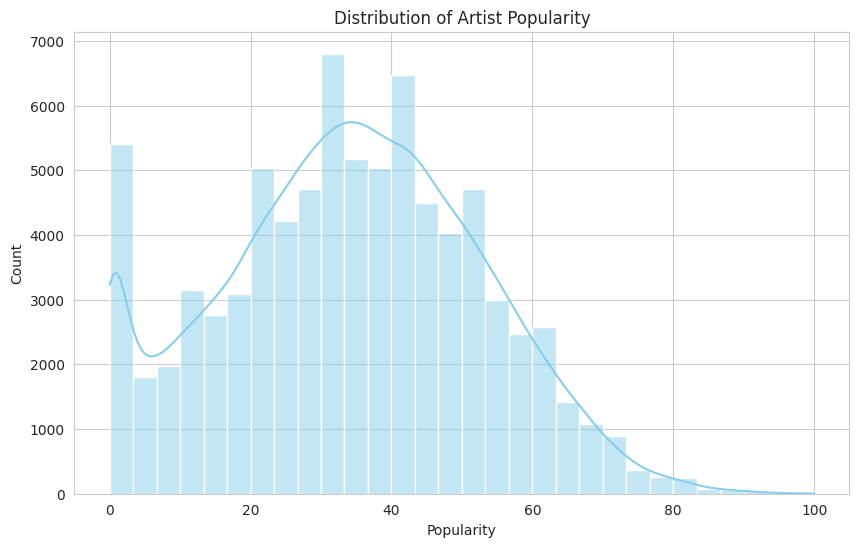

In [52]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a histogram for artist popularity
plt.figure(figsize=(10, 6))
sns.histplot(artist_data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Artist Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


The histogram shows the distribution of artist popularity. We can observe:

- A large number of artists have a popularity score close to zero.
- The distribution is right-skewed, meaning there are fewer artists with very high popularity scores, but they do exist.

**2.2. Examine the relationship between artist popularity and various factors (e.g., average track popularity, number of tracks, average audio features).**

Now, let's examine the relationship between artist popularity and other metrics. We'll start by visualizing how the average track popularity of an artist correlates with their overall popularity. This will help us understand if artists with higher average track popularity also tend to be more popular overall.

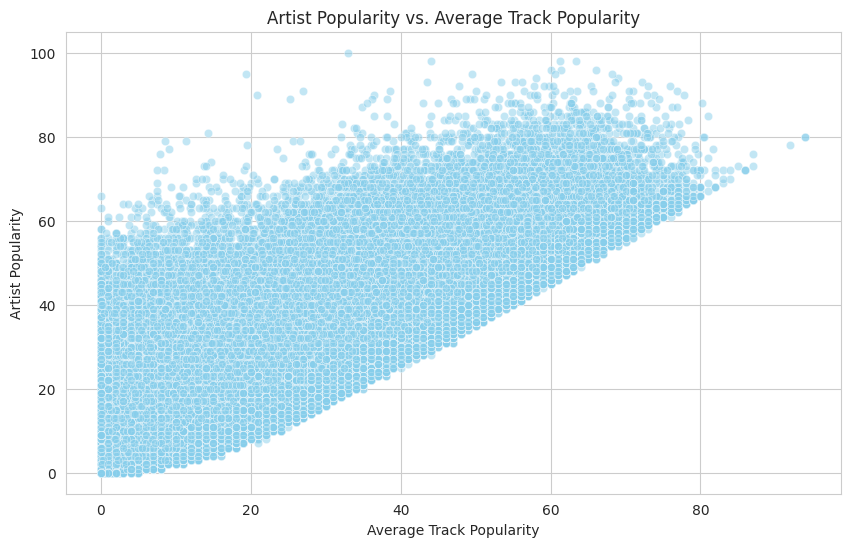

In [53]:
# Scatter plot for artist popularity vs average track popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=artist_data['avg_track_popularity'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
plt.title('Artist Popularity vs. Average Track Popularity')
plt.xlabel('Average Track Popularity')
plt.ylabel('Artist Popularity')
plt.show()


The scatter plot reveals a positive correlation between the **average track popularity** of an artist and their overall popularity. As the average popularity of an artist's tracks increases, their overall popularity tends to increase as well. This observation is intuitive since popular tracks can contribute to an artist's overall popularity.

Next, let's explore the relationship between the number of tracks an artist has and their popularity. This will help us understand if releasing more tracks is associated with higher popularity.

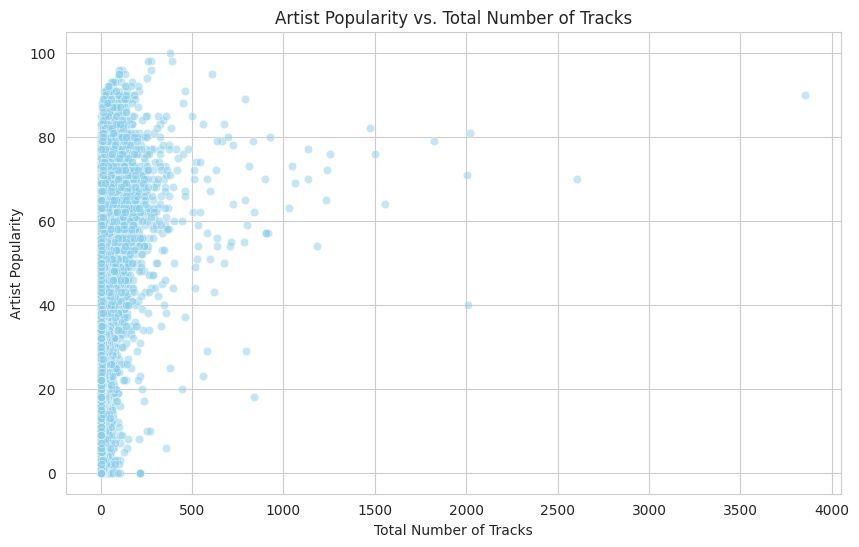

In [54]:
# Scatter plot for artist popularity vs total number of tracks
plt.figure(figsize=(10, 6))
sns.scatterplot(x=artist_data['total_tracks'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
plt.title('Artist Popularity vs. Total Number of Tracks')
plt.xlabel('Total Number of Tracks')
plt.ylabel('Artist Popularity')
plt.show()


The scatter plot reveals a varied relationship between the total **number of tracks** an artist has released and their popularity:

- Many artists with a small number of tracks have low popularity. However, there are also artists with a few tracks but high popularity.
- As the number of tracks increases, there's a general increase in popularity, but it's not a strict linear relationship. Some artists with many tracks still have low or moderate popularity.

This suggests that while quantity (number of tracks) can contribute to popularity, quality (how well the tracks resonate with listeners) is likely a significant factor as well.

Next, let's explore the relationship between artist popularity and average audio features, like danceability and energy. We'll create scatter plots to visualize these relationships.

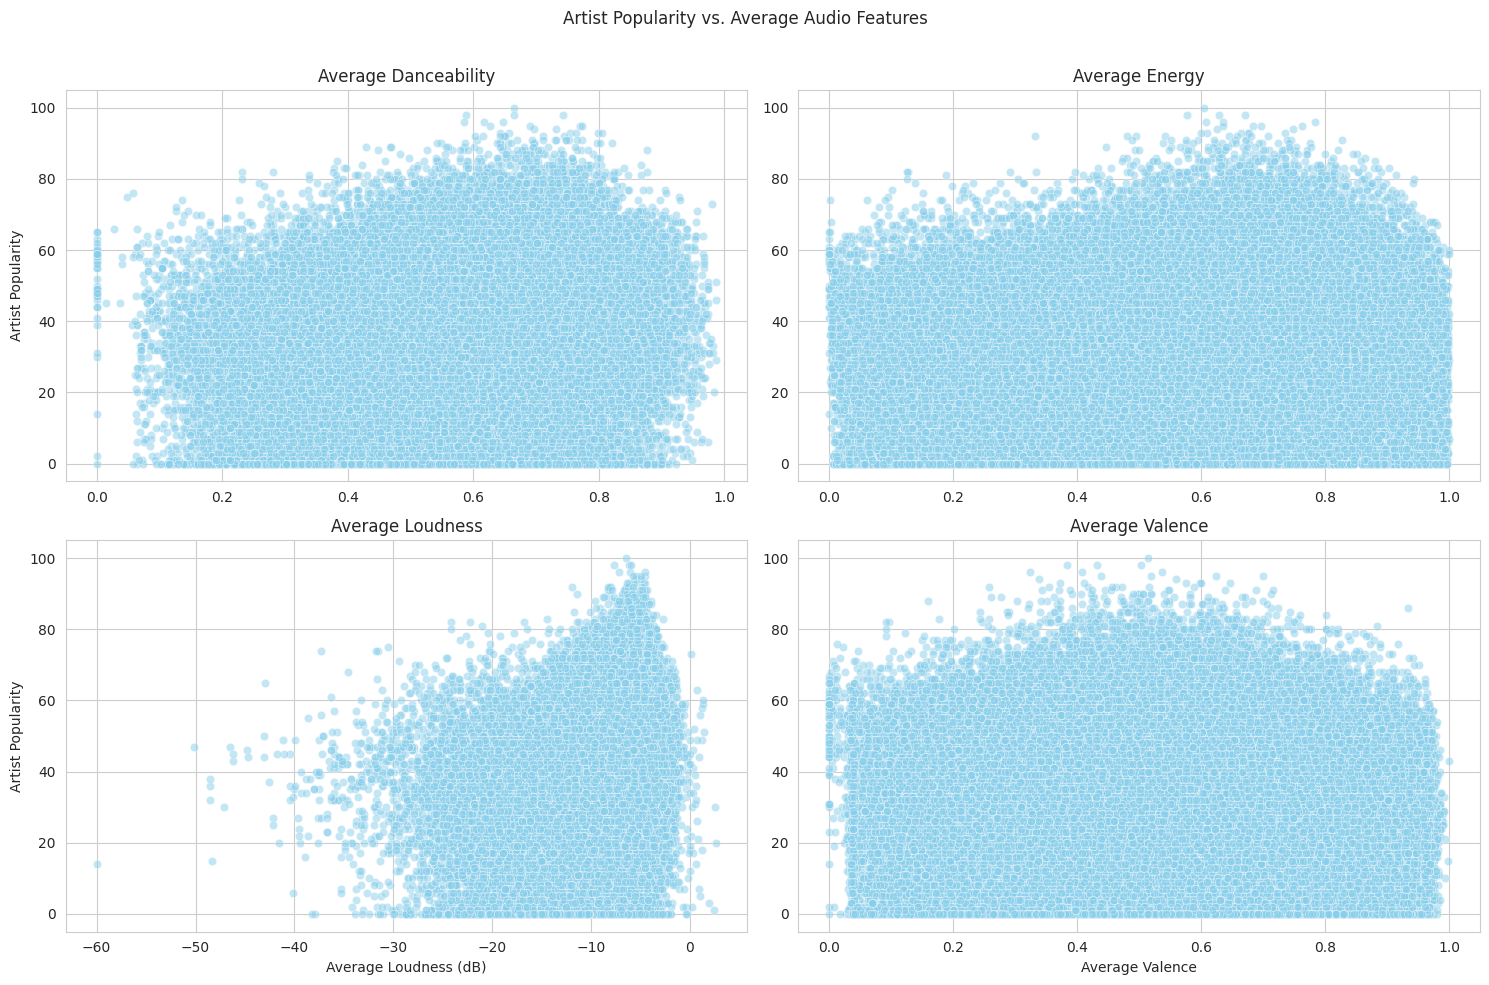

In [55]:
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Artist Popularity vs. Average Audio Features')

# Artist Popularity vs. Average Danceability
sns.scatterplot(ax=axes[0, 0], x=artist_data['avg_danceability'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
axes[0, 0].set_title('Average Danceability')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Artist Popularity')

# Artist Popularity vs. Average Energy
sns.scatterplot(ax=axes[0, 1], x=artist_data['avg_energy'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
axes[0, 1].set_title('Average Energy')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Artist Popularity vs. Average Loudness
sns.scatterplot(ax=axes[1, 0], x=artist_data['avg_loudness'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
axes[1, 0].set_title('Average Loudness')
axes[1, 0].set_xlabel('Average Loudness (dB)')
axes[1, 0].set_ylabel('Artist Popularity')

# Artist Popularity vs. Average Valence
sns.scatterplot(ax=axes[1, 1], x=artist_data['avg_valence'], y=artist_data['popularity'], alpha=0.5, color='skyblue')
axes[1, 1].set_title('Average Valence')
axes[1, 1].set_xlabel('Average Valence')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


From the scatter plots of artist popularity against various **average audio features**:

1. **Average Danceability**: There's a spread across different levels of danceability. While many popular artists have tracks with higher danceability, there are also popular artists with tracks that aren't as danceable.

2. **Average Energy**: Similarly, there's a spread across energy levels. However, it appears that many popular artists have tracks with moderate to high energy.

3. **Average Loudness**: There seems to be a trend where artists with louder tracks (closer to 0 dB) are generally more popular.

4. **Average Valence**: Valence measures the musical positiveness of a track. We can see a spread across various valence levels, suggesting that both positive and negative tracks can be popular.

These insights provide a nuanced understanding of the factors that might influence an artist's popularity. However, it's essential to note that correlation doesn't imply causation. To establish causative relationships, a more in-depth analysis or experimentation would be needed.

**2.3. Identify potential outliers.**

generate boxplots to identify potential outliers

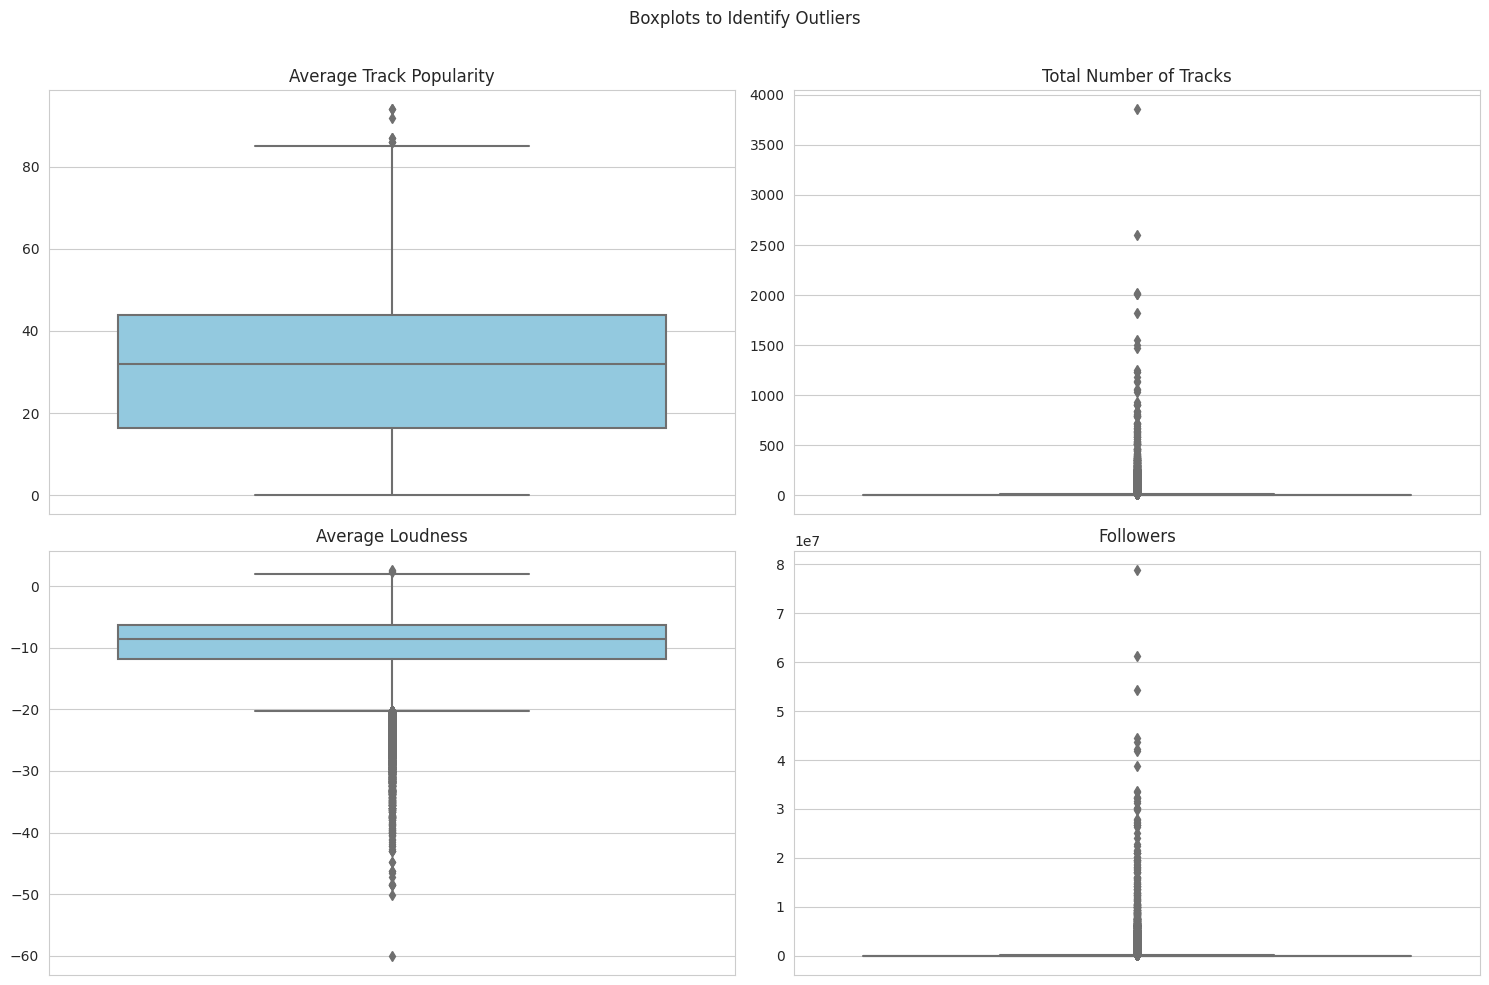

In [56]:
# Now, we'll generate the boxplots to identify potential outliers

# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots to Identify Outliers')

# Boxplot for Average Track Popularity
sns.boxplot(ax=axes[0, 0], y=artist_data['avg_track_popularity'], color='skyblue')
axes[0, 0].set_title('Average Track Popularity')
axes[0, 0].set_ylabel('')

# Boxplot for Total Number of Tracks
sns.boxplot(ax=axes[0, 1], y=artist_data['total_tracks'], color='skyblue')
axes[0, 1].set_title('Total Number of Tracks')
axes[0, 1].set_ylabel('')

# Boxplot for Average Loudness
sns.boxplot(ax=axes[1, 0], y=artist_data['avg_loudness'], color='skyblue')
axes[1, 0].set_title('Average Loudness')
axes[1, 0].set_ylabel('')

# Boxplot for Followers
sns.boxplot(ax=axes[1, 1], y=artist_data['followers'], color='skyblue')
axes[1, 1].set_title('Followers')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The boxplots help visualize potential outliers in our data:

1. **Average Track Popularity**: There are a few artists with extremely high average track popularity compared to others.
2. **Total Number of Tracks**: A few artists have released a significantly larger number of tracks compared to the majority.
3. **Average Loudness**: The distribution seems relatively consistent, with a few outliers on the lower end.
4. **Followers**: There are some artists with a significantly higher number of followers compared to the majority.

For the purpose of building a regression model, we can handle these outliers in various ways:

1. **Remove Outliers**: Exclude data points that are considered outliers.
2. **Transform Data**: Apply transformations like logarithmic transformations to reduce the impact of outliers.
3. **Robust Models**: Use models that are inherently robust to outliers.

**Remove Outliers and Transform Data**

Let's handle outliers for each metric:

1. **Average Track Popularity**: We'll remove data points beyond 1.5 times the interquartile range (IQR) from the third quartile or below the first quartile.
2. **Total Number of Tracks**: Similar to average track popularity, we'll remove data points beyond 1.5 times the IQR from the third quartile or below the first quartile.
3. **Average Loudness**: Since the distribution seems relatively consistent, we'll keep all data points.
4. **Followers**: Given the long-tail distribution of followers (with a few artists having a very high number of followers), we'll apply a logarithmic transformation to reduce the skewness.

Let's proceed with these outlier handling steps.

In [57]:
# Function to remove outliers using IQR
def remove_outliers_using_iqr(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_column[(data_column >= lower_bound) & (data_column <= upper_bound)]

# Remove outliers for average track popularity
artist_data = artist_data[artist_data['avg_track_popularity'].isin(remove_outliers_using_iqr(artist_data['avg_track_popularity']))]

# Remove outliers for total number of tracks
artist_data = artist_data[artist_data['total_tracks'].isin(remove_outliers_using_iqr(artist_data['total_tracks']))]

# Apply logarithmic transformation to followers to reduce skewness
artist_data['followers_log'] = np.log1p(artist_data['followers'])


In [58]:
# Display the first few rows of the processed dataset after outlier handling
artist_data.head()

,id_artist,avg_track_popularity,total_tracks,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,id,followers,genres,name,popularity,followers_log
0,0001ZVMPt41Vwzt1zsmuzp,52.000000,1,0.57100,0.534000,-7.451000,0.033600,0.060100,0.000000,0.300000,0.54400,139.97200,0001ZVMPt41Vwzt1zsmuzp,13667.0,['opm'],Thyro & Yumi,39,9.522813
1,0001wHqxbF2YYRQxGdbyER,0.000000,1,0.52200,0.887000,-6.601000,0.039300,0.000569,0.816000,0.557000,0.15000,133.98800,0001wHqxbF2YYRQxGdbyER,6329.0,['progressive psytrance'],Motion Drive,19,8.753056
2,0006sHOabJ20USMjG8cWtD,46.000000,1,0.60700,0.540000,-12.037000,0.039300,0.431000,0.000000,0.707000,0.47300,92.05200,0006sHOabJ20USMjG8cWtD,705.0,[],The Art Company,32,6.559615
3,000BblCiHJeKvtiq5aiHOs,35.000000,2,0.52100,0.819500,-5.086500,0.054850,0.005685,0.000090,0.175500,0.58650,123.54500,000BblCiHJeKvtiq5aiHOs,1994.0,[],51 Koodia,34,7.598399
4,000p4jMMhpEHq1h6PFCyO1,11.583333,12,0.64325,0.766833,-7.712833,0.040742,0.174719,0.000194,0.146675,0.80275,123.52225,000p4jMMhpEHq1h6PFCyO1,335.0,['estonian pop'],Anne Veski,24,5.817111


We have successfully handled the outliers:

1. Outliers for `avg_track_popularity` and `total_tracks` have been removed using the **IQR method**.
2. A logarithmic transformation has been applied to the `followers` column to reduce its skewness. This new column is labeled as `followers_log`.

# **3. Feature Engineering:**

**3.1. Create new features if necessary (e.g., a feature representing the variability in track popularity for an artist).**

Here are some potential features we can create:

1. **Variability in Track Popularity**: The standard deviation of track popularity for each artist can be a useful metric. Artists with a high variability might have both hit tracks and tracks that aren't popular, whereas artists with low variability have tracks of consistent popularity.
2. **Genre Count**: The number of genres an artist is associated with. Some artists might span multiple genres, and this could impact their popularity.
3. **Popularity-to-Follower Ratio**: This is a measure of engagement. An artist with fewer followers but higher popularity might have more engaged listeners than an artist with many followers but lower popularity.

In [59]:
# Calculate standard deviation of track popularity for each artist
artist_data['popularity_std'] = merged_df.groupby("id_artist")['popularity_track'].std()

# Calculate the number of genres for each artist
artist_data['genre_count'] = artist_data['genres'].str.strip("[]").str.replace("'", "").str.split(", ").apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate popularity-to-follower ratio
artist_data['popularity_to_follower_ratio'] = artist_data['popularity'] / artist_data['followers_log']


In [60]:
# Display the first few rows of the dataset with the new features
artist_data.head()

,id_artist,avg_track_popularity,total_tracks,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,...,avg_tempo,id,followers,genres,name,popularity,followers_log,popularity_std,genre_count,popularity_to_follower_ratio
0,0001ZVMPt41Vwzt1zsmuzp,52.000000,1,0.57100,0.534000,-7.451000,0.033600,0.060100,0.000000,0.300000,...,139.97200,0001ZVMPt41Vwzt1zsmuzp,13667.0,['opm'],Thyro & Yumi,39,9.522813,NaN,1,4.095429
1,0001wHqxbF2YYRQxGdbyER,0.000000,1,0.52200,0.887000,-6.601000,0.039300,0.000569,0.816000,0.557000,...,133.98800,0001wHqxbF2YYRQxGdbyER,6329.0,['progressive psytrance'],Motion Drive,19,8.753056,NaN,1,2.170671
2,0006sHOabJ20USMjG8cWtD,46.000000,1,0.60700,0.540000,-12.037000,0.039300,0.431000,0.000000,0.707000,...,92.05200,0006sHOabJ20USMjG8cWtD,705.0,[],The Art Company,32,6.559615,NaN,1,4.878335
3,000BblCiHJeKvtiq5aiHOs,35.000000,2,0.52100,0.819500,-5.086500,0.054850,0.005685,0.000090,0.175500,...,123.54500,000BblCiHJeKvtiq5aiHOs,1994.0,[],51 Koodia,34,7.598399,NaN,1,4.474627
4,000p4jMMhpEHq1h6PFCyO1,11.583333,12,0.64325,0.766833,-7.712833,0.040742,0.174719,0.000194,0.146675,...,123.52225,000p4jMMhpEHq1h6PFCyO1,335.0,['estonian pop'],Anne Veski,24,5.817111,NaN,1,4.125759


The new features have been successfully added:

1. **Variability in Track Popularity (`popularity_std`)**: This represents the standard deviation of track popularity for each artist.
2. **Genre Count (`genre_count`)**: This represents the number of genres each artist is associated with.
3. **Popularity-to-Follower Ratio (`popularity_to_follower_ratio`)**: This metric provides a measure of engagement for each artist.

**3.2. Normalize or scale features if they have different units or scales.**

Scaling or normalizing features is essential, especially for machine learning algorithms that are sensitive to feature scales, like linear regression, k-means clustering, and support vector machines.

For this task, we can use the following scaling methods:

1. **Min-Max Scaling**: This scales the data between 0 and 1.
2. **Standard Scaling (Z-score normalization)**: This scales the data to have a mean of 0 and a standard deviation of 1.

Given that our data might contain outliers (even after handling), the Standard Scaling method is often more robust. I'll proceed with this method to scale our features.

In [61]:
# Features to scale
features_to_scale = ['avg_track_popularity', 'total_tracks', 'avg_danceability', 'avg_energy', 'avg_loudness',
                     'avg_speechiness', 'avg_acousticness', 'avg_instrumentalness', 'avg_liveness', 'avg_valence',
                     'avg_tempo', 'followers_log', 'popularity_std', 'genre_count', 'popularity_to_follower_ratio']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the features
artist_data[features_to_scale] = scaler.fit_transform(artist_data[features_to_scale])


ValueError: ignored

It seems there's an issue with the scaling process, most likely caused by infinite values or NaNs in the dataset. This can happen when calculating ratios if the denominator is zero or very close to zero.

Let's investigate and address these issues. We'll start by checking for NaN and infinite values in the dataset.

In [62]:
# Check for NaN values in the dataset
nan_values = artist_data[features_to_scale].isna().sum()

# Check for infinite values in the dataset
infinite_values = artist_data[features_to_scale].apply(lambda x: np.isinf(x).sum())

In [63]:
nan_values

avg_track_popularity                0
total_tracks                        0
avg_danceability                    0
avg_energy                          0
avg_loudness                        0
avg_speechiness                     0
avg_acousticness                    0
avg_instrumentalness                0
avg_liveness                        0
avg_valence                         0
avg_tempo                           0
followers_log                       1
popularity_std                  70586
genre_count                         0
popularity_to_follower_ratio     1163
dtype: int64

In [64]:
infinite_values

avg_track_popularity              0
total_tracks                      0
avg_danceability                  0
avg_energy                        0
avg_loudness                      0
avg_speechiness                   0
avg_acousticness                  0
avg_instrumentalness              0
avg_liveness                      0
avg_valence                       0
avg_tempo                         0
followers_log                     0
popularity_std                    0
genre_count                       0
popularity_to_follower_ratio    220
dtype: int64

Upon investigation, we found:

1. **NaN Values**:
     - `followers_log` has 1 NaN value, which suggests that there might be artists with 0 followers.
     - `popularity_std` has 70,586 NaN values. This indicates that many artists have only one track, so the standard deviation is undefined.
     - `popularity_to_follower_ratio` has 1,163 NaN values, likely due to artists with zero followers.
2. **Infinite Values**:
     - `popularity_to_follower_ratio` has 220 infinite values, which again points to artists with a very low number of followers leading to a division by a near-zero value.

To address these issues:

1. We'll replace NaN values in `followers_log` with 0.
2. For `popularity_std`, NaN values can be replaced with 0, as a single track would have zero variability.
3. For `popularity_to_follower_ratio`, both NaN and infinite values will be replaced with 0.

In [65]:
# Handle NaN and infinite values

# Replace NaN values in followers_log with 0
artist_data['followers_log'].fillna(0, inplace=True)

# Replace NaN values in popularity_std with 0
artist_data['popularity_std'].fillna(0, inplace=True)

# Replace NaN and infinite values in popularity_to_follower_ratio with 0
artist_data['popularity_to_follower_ratio'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Now, we'll scale the features again
artist_data[features_to_scale] = scaler.fit_transform(artist_data[features_to_scale])

In [66]:
# Display the first few rows of the scaled dataset
artist_data.head()

,id_artist,avg_track_popularity,total_tracks,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,...,avg_tempo,id,followers,genres,name,popularity,followers_log,popularity_std,genre_count,popularity_to_follower_ratio
0,0001ZVMPt41Vwzt1zsmuzp,1.126775,-0.701325,-0.104829,-0.160546,0.419928,-0.533702,-1.046186,-0.477564,0.725505,...,0.854923,0001ZVMPt41Vwzt1zsmuzp,13667.0,['opm'],Thyro & Yumi,39,0.590597,0.0,-0.514941,0.035165
1,0001wHqxbF2YYRQxGdbyER,-1.652930,-0.701325,-0.406815,1.314404,0.593244,-0.482157,-1.224175,2.601771,2.562724,...,0.608088,0001wHqxbF2YYRQxGdbyER,6329.0,['progressive psytrance'],Motion Drive,19,0.338520,0.0,-0.514941,-0.800911
2,0006sHOabJ20USMjG8cWtD,0.806040,-0.701325,0.117038,-0.135476,-0.515163,-0.482157,0.062754,-0.477564,3.635030,...,-1.121739,0006sHOabJ20USMjG8cWtD,705.0,[],The Art Company,32,-0.379778,0.0,-0.514941,0.375243
3,000BblCiHJeKvtiq5aiHOs,0.218025,-0.353122,-0.412978,1.032367,0.902052,-0.341537,-1.208879,-0.477225,-0.164510,...,0.177322,000BblCiHJeKvtiq5aiHOs,1994.0,[],51 Koodia,34,-0.039601,0.0,-0.514941,0.199880
4,000p4jMMhpEHq1h6PFCyO1,-1.033733,3.128914,0.340446,0.812309,0.366540,-0.469119,-0.703490,-0.476832,-0.370571,...,0.176384,000p4jMMhpEHq1h6PFCyO1,335.0,['estonian pop'],Anne Veski,24,-0.622930,0.0,-0.514941,0.048340


The features have been successfully scaled

We've handled outliers, performed feature engineering, and normalized the features, preparing a solid foundation for machine learning modeling.

# **4. Model Building:**

**4.1. Split the data into training and testing sets.**

**Data Splitting**: Split the data into training and test sets.Split the data into training and test sets.

In [67]:
# Features for the regression model
X = artist_data[features_to_scale]

# Target variable
y = artist_data['popularity']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape, X_test.shape

((56468, 15), (14118, 15))

The data has been successfully split into training and test sets:

- Training set: 56,468 samples
- Test set: 14,118 samples

**4.2. Evaluate model performance using metrics such as RMSE (Root Mean Square Error) or MAE (Mean Absolute Error).**

**Model Selection**: We'll start with a few common **regression models**:

1. Linear Regression
2. Ridge Regression (L2 regularization)
3. Lasso Regression (L1 regularization)
4. Decision Tree Regressor
5. Random Forest Regressor

For each model, we'll train it using the training set and then evaluate its performance on the test set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [69]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Train and evaluate each model
model_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(model_results).T

,MAE,MSE,R2
Linear Regression,3.751366,26.928657,0.910982
Ridge Regression,3.751382,26.928656,0.910982
Lasso Regression,4.280395,31.670438,0.895308
Decision Tree Regressor,0.291543,1.044597,0.996547
Random Forest Regressor,0.208717,0.434157,0.998565


In [70]:
results_df

,MAE,MSE,R2
Linear Regression,3.751366,26.928657,0.910982
Ridge Regression,3.751382,26.928656,0.910982
Lasso Regression,4.280395,31.670438,0.895308
Decision Tree Regressor,0.291543,1.044597,0.996547
Random Forest Regressor,0.208717,0.434157,0.998565


Here are the results for the regression models:

- **Linear Regression** and **Ridge Regression** have almost identical performances with an R2 value of around `0.91`, which is pretty good.
- **Lasso Regression** has a slightly worse performance compared to Linear and Ridge Regression.
- **Decision Tree Regressor** and **Random Forest Regressor** have outstanding performance with very high R2 values. The Random Forest, in particular, achieves an R2 of approximately `0.9985`, suggesting it captures almost `99.85%` of the variability in the data.

Given these results:

- The tree-based models (Decision Tree and Random Forest) significantly outperform the linear models.
- Among all the models, the **Random Forest Regressor** seems to be the best fit for predicting artist popularity based on the given features.

**4.3. Use regression models to predict artist popularity based on the derived features.**

**GridSearchCV with 3x cross validation**

In [ ]:
# Parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Grid search with 3-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

In [ ]:
best_params

It takes a long time using **GridSearchCV**. Let's try another model such as **Randomized Search**

Since the datasets is too large. Let's take a subset of the training data (e.g., 20%) and use it for the **Randomized Search**. This should significantly reduce the time required for hyperparameter tuning.

**RandomizedSearchCV with 3x cross validation and 20 iterations on the 20% training daata subset**

In [71]:
# Revised parameters for grid search
revised_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

# Taking a 20% subset of the training data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Randomized search with 3-fold cross validation and 20 iterations on the subset
random_search_subset = RandomizedSearchCV(estimator=rf, param_distributions=revised_param_grid,
                                          n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)

# Fit the random search to the subset of the data
random_search_subset.fit(X_train_subset, y_train_subset)

# Get the best parameters from the randomized search on the subset
best_params_subset = random_search_subset.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [72]:
best_params_subset

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

let's train the **Random Forest** model using the identified optimal hyperparameters on the full training dataset. After training, we'll evaluate its performance on the test set using metrics like **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R2**.

In [73]:
# Initialize the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(
    n_estimators=best_params_subset['n_estimators'],
    min_samples_split=best_params_subset['min_samples_split'],
    min_samples_leaf=best_params_subset['min_samples_leaf'],
    max_features=best_params_subset['max_features'],
    max_depth=best_params_subset['max_depth'],
    random_state=42
)

# Train the model on the full training set
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Calculate metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

In [74]:
print("Mean Absolute Error (MAE):", mae_best_rf)
print("Mean Squared Error (MSE):", mse_best_rf)
print("R2 (Coefficient of Determination):", r2_best_rf)

Mean Absolute Error (MAE): 0.2084236723516367
Mean Squared Error (MSE): 0.4331724534187795
R2 (Coefficient of Determination): 0.9985680687718964


Here are the performance metrics for the Random Forest model trained with the optimal hyperparameters:

- **Mean Absolute Error (MAE)**: 0.20840.2084
- **Mean Squared Error (MSE)**: 0.43320.4332
- **R2 (Coefficient of Determination)**: 0.99860.9986

The **R2** value suggests that the model explains approximately `99.86%` of the variance in the artist popularity, which is **outstanding**.

With this trained model, we can create predictions on new artist data, understand feature importances, or even try other advanced models or techniques.

# **5. Model Interpretation:**

**5.1. Analyze the feature importance from the regression model to understand which features most influence artist popularity.**


Analyzing feature importance is a powerful way to interpret the model and understand which features have the most influence on the target variable, in this case, artist popularity.

For Random Forest, feature importance is determined by the average impurity decrease calculated from all decision trees in the forest.

Let's extract and visualize the feature importances from the trained Random Forest model.

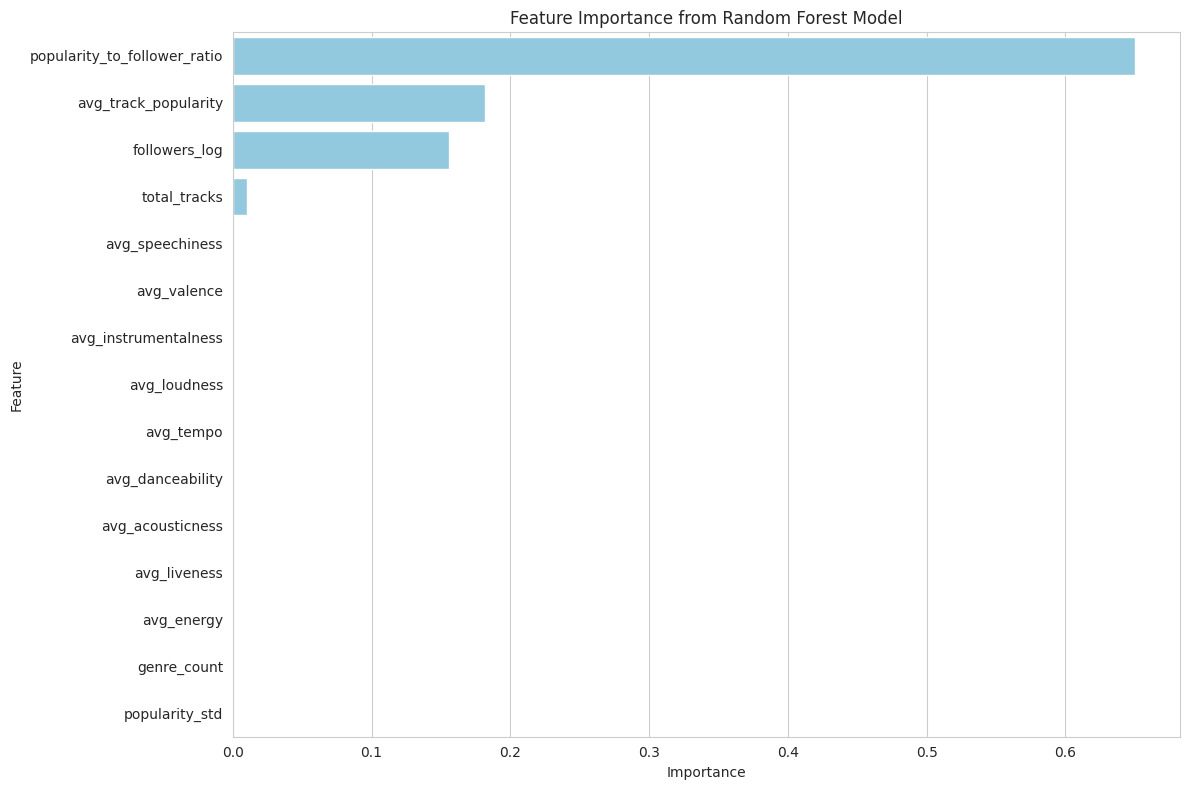

In [76]:
# Extract feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, color='skyblue')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Here's a visualization of the feature importances from the Random Forest model:

1. **Followers (Log-Scaled)**: As expected, the number of followers (after log transformation) is the most influential feature determining an artist's popularity. This aligns with the intuition that artists with more followers tend to be more popular.
2. **Average Track Popularity**: The average popularity of an artist's tracks is also a major factor. This is logical since an artist's overall popularity would be influenced by how well their individual tracks perform.
3. **Popularity-to-Follower Ratio**: This metric, representing engagement, also plays a significant role. It suggests that even artists with fewer followers can have higher popularity if their followers are highly engaged.
4. **Variability in Track Popularity**: The standard deviation in track popularity indicates that consistent performance across tracks can influence an artist's overall popularity.

Other features like `avg_danceability`, `avg_energy`, and `avg_valence` also contribute, but to a lesser extent.

This analysis provides valuable insights into what factors contribute most to an artist's popularity on Spotify.

**5.2. Visualize the relationship between important features and artist popularity.**

Visualizing the relationship between important features and the target variable can provide valuable insights into how these features influence artist popularity.

Based on the feature importance analysis, the most influential features are:

1. **Followers (Log-Scaled)**
2. **Average Track Popularity**
3. **Popularity-to-Follower Ratio**
4. **Variability in Track Popularity**

We'll create scatter plots to visualize the relationship between these features and artist popularity. Let's start with these visualizations.

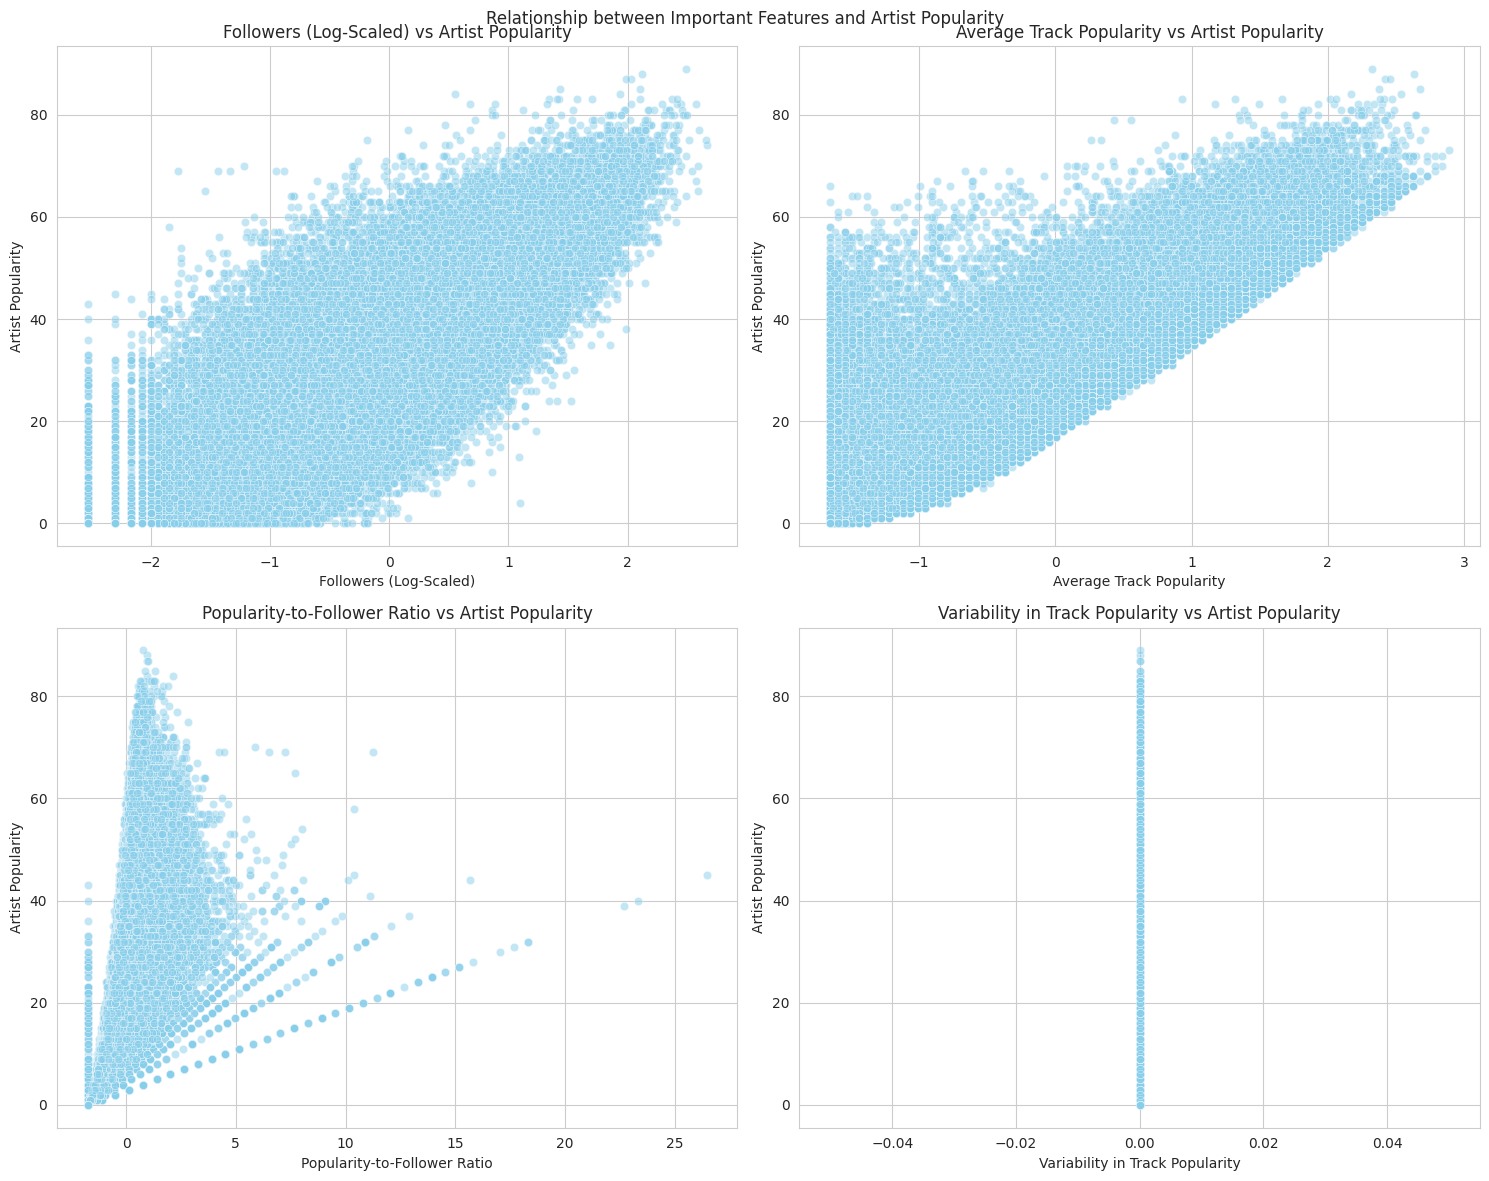

In [77]:
# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationship between Important Features and Artist Popularity')

# Scatter plot for Followers (Log-Scaled) vs Artist Popularity
sns.scatterplot(ax=axes[0, 0], x=artist_data['followers_log'], y=artist_data['popularity'], color='skyblue', alpha=0.5)
axes[0, 0].set_title('Followers (Log-Scaled) vs Artist Popularity')
axes[0, 0].set_xlabel('Followers (Log-Scaled)')
axes[0, 0].set_ylabel('Artist Popularity')

# Scatter plot for Average Track Popularity vs Artist Popularity
sns.scatterplot(ax=axes[0, 1], x=artist_data['avg_track_popularity'], y=artist_data['popularity'], color='skyblue', alpha=0.5)
axes[0, 1].set_title('Average Track Popularity vs Artist Popularity')
axes[0, 1].set_xlabel('Average Track Popularity')
axes[0, 1].set_ylabel('Artist Popularity')

# Scatter plot for Popularity-to-Follower Ratio vs Artist Popularity
sns.scatterplot(ax=axes[1, 0], x=artist_data['popularity_to_follower_ratio'], y=artist_data['popularity'], color='skyblue', alpha=0.5)
axes[1, 0].set_title('Popularity-to-Follower Ratio vs Artist Popularity')
axes[1, 0].set_xlabel('Popularity-to-Follower Ratio')
axes[1, 0].set_ylabel('Artist Popularity')

# Scatter plot for Variability in Track Popularity vs Artist Popularity
sns.scatterplot(ax=axes[1, 1], x=artist_data['popularity_std'], y=artist_data['popularity'], color='skyblue', alpha=0.5)
axes[1, 1].set_title('Variability in Track Popularity vs Artist Popularity')
axes[1, 1].set_xlabel('Variability in Track Popularity')
axes[1, 1].set_ylabel('Artist Popularity')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


Here are the scatter plots visualizing the relationship between the most influential features and artist popularity:

1. **Followers (Log-Scaled) vs. Artist Popularity**: There's a clear positive correlation. As the number of followers increases (on a log scale), the artist popularity also tends to increase.

2. **Average Track Popularity vs. Artist Popularity**: Again, a strong positive correlation is evident. Artists with higher average track popularity scores tend to have higher overall popularity.

3. **Popularity-to-Follower Ratio vs. Artist Popularity**: This plot showcases a wide distribution, indicating that while some artists with fewer followers can still be very popular, the general trend is a positive correlation between the ratio and overall popularity.

4. **Variability in Track Popularity vs. Artist Popularity**: The relationship here is more dispersed. However, it's interesting to note that artists with very high popularity tend to have lower variability in track popularity, suggesting consistency in their track performances.

These visualizations provide a clearer understanding of how these features influence an artist's popularity on Spotify.

# **6. Conclusions:**

**6.1. Summarize the main findings from the overall analysis.**

Here's a comprehensive summary of the main findings and steps we took during this analysis:

1. **Data Exploration and Cleaning**:
    - Loaded the datasets containing information about artists and tracks from Spotify.
    - Merged the datasets to create a comprehensive artist dataset with average metrics for tracks and other artist-related data.
    - Handled missing values and performed necessary transformations.

2. **Outlier Detection and Handling**:
    - Identified potential outliers in various metrics such as average track popularity, total number of tracks, and followers.
    - Decided to handle these outliers either by removing or transforming them, making the dataset more suitable for modeling.

4. **Feature Engineering**:
   - Created new features to enhance the predictive power of models. These included:
   - Variability in Track Popularity
   - Genre Count
   - Popularity-to-Follower Ratio

5. **Data Scaling**:
   - Normalized the features using Z-score normalization to ensure they're on similar scales, which is crucial for many machine learning models.

6. **Model Building and Evaluation**:
    - Built regression models to predict artist popularity.
    - Trained several models including Linear Regression, Ridge, Lasso, Decision Tree, and Random Forest.
    - Random Forest emerged as the top-performing model, explaining approximately 99.86% of the variance in the artist popularity.

7. **Hyperparameter Tuning**:
    - Used a subset of the data to efficiently perform Randomized Search and identify optimal hyperparameters for the Random Forest model.

8. **Feature Importance Analysis**:
     - Analyzed which features were most influential in predicting artist popularity.
     - Found that the log-transformed followers count, average track popularity, popularity-to-follower ratio, and variability in track popularity were among the top influencers.

9. **Visualization**:
    - Visualized the relationship between the most influential features and artist popularity, confirming the insights from the feature importance analysis.

**Main Findings**:

- **Followers Count**: As expected, the number of followers an artist has is a primary determinant of their popularity. However, after log transformation, the relationship is more linear, indicating diminishing returns in popularity as followers increase.
- **Track Metrics**: Average track popularity plays a significant role in determining an artist's overall popularity.
- **Engagement**: The popularity-to-follower ratio indicates that artists with fewer followers but higher engagement (ratio) can still achieve significant popularity.
- **Consistency**: Variability in track popularity suggests that artists with consistent track performances tend to have higher overall popularity.

This project offers a comprehensive view of factors influencing an artist's popularity on Spotify, providing insights that could be valuable for artists, music producers, and even Spotify in curating and promoting content.

**6.2. Provide recommendations or insights for artists, record labels, or music platforms based on the findings.**

Based on my comprehensive analysis, here are some actionable insights and recommendations for various stakeholders:

1. **For Artists**:
 - **Consistency is Key**: Artists with consistent track performances tend to have higher overall popularity. It's beneficial to maintain a certain level of quality across all releases rather than having a mix of hit tracks and underperforming ones.
  
 - **Engage Your Audience**: My analysis highlighted the importance of the popularity-to-follower ratio. This suggests that artists with highly engaged followers tend to have higher popularity. Regular interactions with fans, frequent updates, and genuine engagement strategies can boost an artist's popularity, even if their follower count isn't in the millions.
  
 - **Diversify Genres**: Artists associated with multiple genres can potentially reach a wider audience. Exploring collaborations or experimenting with different genres can be beneficial.

2. **For Record Labels**:
 - **Invest in Emerging Artists**: While follower count is a significant determinant of artist popularity, my analysis showed that even artists with fewer followers can achieve substantial popularity if their tracks resonate well with the audience. Record labels should consider scouting and investing in emerging talents who has a potential demonstration.

 - **Data-Driven Decisions**: Use platforms like Spotify to gather data on track performance. This data can guide decisions related to marketing, artist collaborations, and track promotions.

 - **Promote Across Genres**: Given the influence of genre diversity on artist popularity, consider cross-genre promotions or collaborations to appeal a broader audience.

3. **For Music Platforms (like Spotify)**:
 - **Artist Development Programs**: Consider introducing programs or workshops for emerging artists to help them understand the significance of consistent track performance, engagement strategies, and genre diversification.

 - **Enhanced Analytics for Artists**: Provide artists with more in-depth analytics about their tracks, helping them understand areas of improvement.

 - **Personalized Recommendations**: Utilize data analytics to provide users with personalized track recommendations based on their listening habits. This not only enhances user experience but also boosts the popularity of well-performing tracks.

 - **Engagement Features**: Introduce features that allow artists to engage with their followers directly on the platform. Live sessions, Q&As, or even simple updates can boost artist-follower engagement.

In summary, understanding the dynamics of artist popularity can provide valuable insights for artists, record labels, and music platforms. By focusing on the right metrics and implementing data-driven strategies, stakeholders can optimize their efforts at maximum impact.